## Adidas vs Nike Shoes

# DEFINE

### What brand makes the most popular shoe?

In [1]:
#load everything we might need
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

__author__ = "Skyler Bullard"
__email__ = "skylercarcom@gmail.com"

In [2]:
#load the data
data = pd.read_csv( 'Adidas Vs Nike.csv' )

# DISCOVER

In [3]:
#rename columns in dataframe
data.rename( columns = { "Product Name" : "Style" , "Product ID" : "ID" ,
                       "Listing Price" : "ListPrice" , "Sale Price" : "SalePrice" }
            , inplace = True )

In [4]:
data.head()

,Style,ID,ListPrice,SalePrice,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


### We have a 3,268 x 10 (row x column) dataframe

#### Description contains missing values

In [5]:
data.info()
print( data.size )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
Style           3268 non-null object
ID              3268 non-null object
ListPrice       3268 non-null int64
SalePrice       3268 non-null int64
Discount        3268 non-null int64
Brand           3268 non-null object
Description     3265 non-null object
Rating          3268 non-null float64
Reviews         3268 non-null int64
Last Visited    3268 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB
32680


#### 'ListPrice' contains an item worth zero dollars

#### A SalePrice can be larger than a ListPrice

#### The most reviews for one Style is 223

In [6]:
data.describe()

,ListPrice,SalePrice,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


## Search for outliers

### Keep model's outlier because 5,000 dollars is insignificant

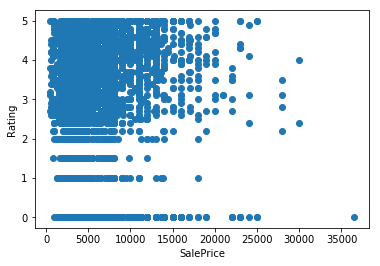

In [10]:
x = 'SalePrice'
y = 'Rating'

plt.xlabel( x )
plt.ylabel( y )
plt.scatter( data[x] , data[y] )

In [20]:
#examine outlier data

rating_outlier = data[ data[ 'SalePrice'] > 35000 ]

print( rating_outlier )

                                Style          ID  ListPrice  SalePrice  \
3148  Nike Air VaporMax Flyknit 2 LXX  AT5673-700          0      36500   

      Discount Brand                                        Description  \
3148         0  Nike  The Nike Air VaporMax Flyknit 2 LXX places you...   

      Rating  Reviews         Last Visited  
3148     0.0        0  2020-04-13T15:36:42  


## Examine model's 'Reviews' outlier

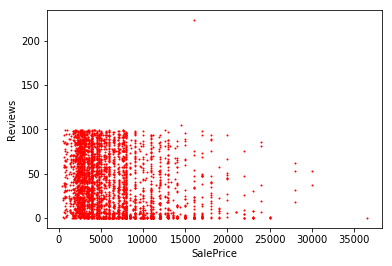

In [17]:
x = 'SalePrice'
y = 'Reviews'

plt.xlabel( x )
plt.ylabel( y )
plt.scatter( data[x] , data[y] , c = 'red' , s = 1 )

In [22]:
#examine outlier data

reviews_outlier = data[ data['Reviews'] > 200 ]

print( reviews_outlier )

                    Style          ID  ListPrice  SalePrice  Discount Brand  \
2750  Air Jordan 10 Retro  310805-137          0      15995         0  Nike   

                                            Description  Rating  Reviews  \
2750  Featuring soft, lightweight cushioning, the Ai...     4.7      223   

             Last Visited  
2750  2020-04-13T15:28:25  
